# Importowanie Bibliotek
Import niezbędnych bibliotek: TensorFlow, Keras, NumPy, Pandas oraz bibliotek do przetwarzania danych.

In [2]:
# Importowanie Bibliotek
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Przygotowanie Danych
Wczytanie i przygotowanie danych treningowych, normalizacja danych, podział na zbiór treningowy i testowy.

In [3]:
# Wczytanie danych z pliku CSV
data = pd.read_csv('data.csv')

# Wybór tylko numerycznych kolumn do treningu
numeric_columns = ['Size(L)', 'OG', 'FG', 'ABV', 'IBU', 'Color', 'BoilSize', 'BoilTime', 'BoilGravity', 'Efficiency']
X = data[numeric_columns].copy()

# Uzupełnienie brakujących wartości średnią
X = X.fillna(X.mean())

# Przygotowanie etykiet (gatunków piwa)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(data['Style'])

# Normalizacja danych
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Podział danych na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Konwersja etykiet na format kategoryczny
num_classes = len(np.unique(y))
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

# Wyświetlenie kształtu zbiorów danych
print("Kształt danych treningowych:", X_train.shape)
print("Kształt danych testowych:", X_test.shape)
print("Kształt etykiet treningowych:", y_train.shape)
print("Kształt etykiet testowych:", y_test.shape)

Kształt danych treningowych: (59088, 10)
Kształt danych testowych: (14773, 10)
Kształt etykiet treningowych: (59088, 176)
Kształt etykiet testowych: (14773, 176)


# Utworzenie Modelu Sequential
Zdefiniowanie architektury modelu sekwencyjnego z warstwami Dense, określenie liczby neuronów i funkcji aktywacji.

In [4]:
# Utworzenie Modelu Sequential
model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(len(np.unique(y)), activation='softmax')
])

d:\Anaconda\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Kompilacja Modelu
Kompilacja modelu z wyborem optymalizatora, funkcji straty i metryk.

In [5]:
# Kompilacja Modelu
model.compile(optimizer='adam',  # Użycie optymalizatora Adam
              loss='categorical_crossentropy',  # Funkcja straty do klasyfikacji wieloklasowej
              metrics=['accuracy'])  # Metryka do oceny modelu

# Wyświetlenie podsumowania modelu
model.summary()  # Podsumowanie architektury modelu

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         1,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 176)            │         5,808 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,552 (68.56 KB)

 Trainable params: 17,552 (68.56 KB)

 Non-trainable params: 0 (0.00 B)

# Trenowanie Modelu
Trenowanie modelu na danych treningowych z określoną liczbą epok i rozmiarem batcha.

Epoch 1/50
1478/1478 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.2249 - loss: 3.6159 - val_accuracy: 0.2951 - val_loss: 2.9382
Epoch 2/50
1478/1478 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.3084 - loss: 2.8405 - val_accuracy: 0.3066 - val_loss: 2.8416
Epoch 3/50
1478/1478 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.3200 - loss: 2.7646 - val_accuracy: 0.3197 - val_loss: 2.8131
Epoch 4/50
1478/1478 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.3290 - loss: 2.6956 - val_accuracy: 0.3187 - val_loss: 2.7832
Epoch 5/50
1478/1478 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.3240 - loss: 2.7110 - val_accuracy: 0.3213 - val_loss: 2.7700
Epoch 6/50
1478/1478 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.3277 - loss: 2.6863 - val_accuracy: 0.3285 - val_loss: 2.7523
Epoch 7/50
1478/1478 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.3320 - loss: 2.6682 - val_accuracy: 0.3269 - val_loss: 2.7600
Epoch 8/50
1478/1478 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.3360 - loss: 2.6476 - 

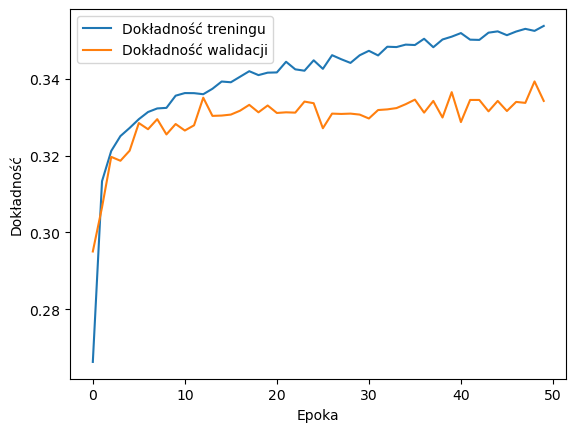

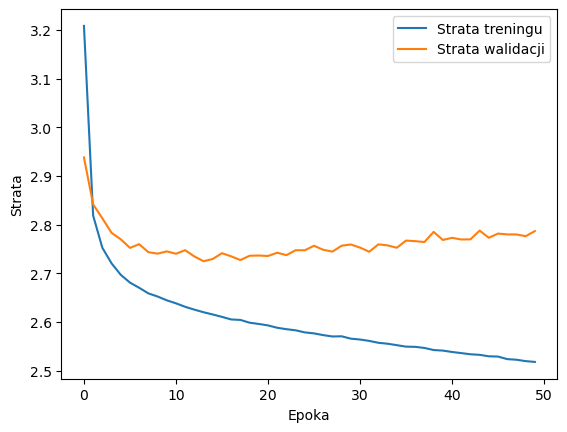

In [6]:
# Trenowanie Modelu

# Trenowanie modelu na danych treningowych z określoną liczbą epok i rozmiarem batcha
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Wykres dokładności
plt.plot(history.history['accuracy'], label='Dokładność treningu')
plt.plot(history.history['val_accuracy'], label='Dokładność walidacji')
plt.xlabel('Epoka')
plt.ylabel('Dokładność')
plt.legend()
plt.show()

# Wykres straty
plt.plot(history.history['loss'], label='Strata treningu')
plt.plot(history.history['val_loss'], label='Strata walidacji')
plt.xlabel('Epoka')
plt.ylabel('Strata')
plt.legend()
plt.show()

# Testowanie i Ewaluacja
Ocena skuteczności modelu na zbiorze testowym i wyświetlenie metryk wydajności.

462/462 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.3399 - loss: 2.7680
Test Loss: 2.7370588779449463
Test Accuracy: 0.34224599599838257
462/462 ━━━━━━━━━━━━━━━━━━━━ 0s 868us/step
Unikalne klasy w y_test_classes: 172
Liczba klas w label_encoder.classes_: 176
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        16
           1       0.00      0.00      0.00        10
           2       0.00      0.00      0.00         3
           3       0.28      0.36      0.31       402
           4       0.47      0.38      0.42        72
           5       0.22      0.39      0.28       217
           6       0.56      0.74      0.64      2361
           7       0.00      0.00      0.00        47
           8       0.24      0.19      0.21       475
           9       0.37      0.58      0.46      1476
          10       0.12      0.02      0.04       168
          11       0.25      0.66      0.36       263
          12       0.12      0.04  

d:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


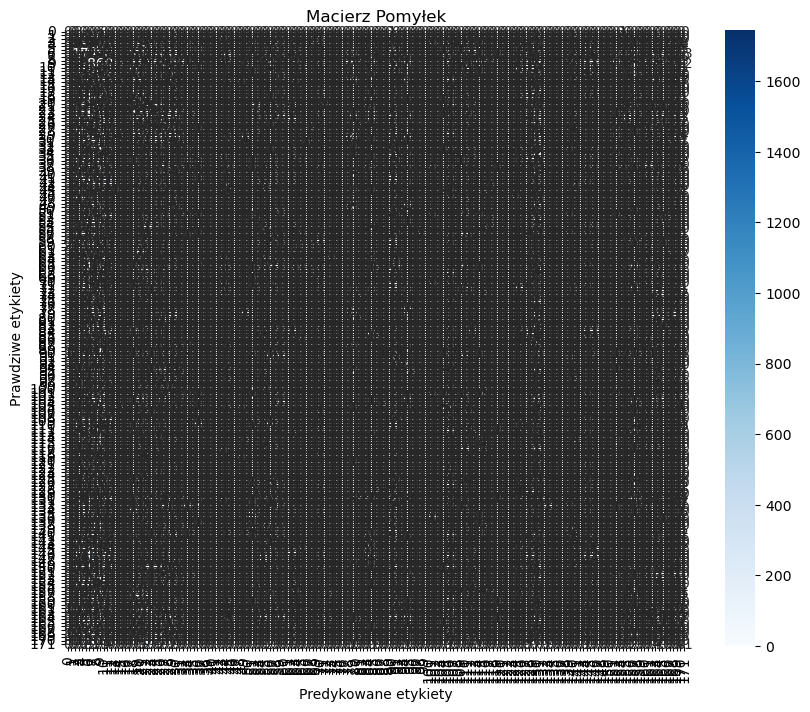

In [7]:
# Testowanie i Ewaluacja

# Ocena modelu na zbiorze testowym
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

# Predykcje na zbiorze testowym
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Konwersja y_test na etykiety klas
y_test_classes = np.argmax(y_test, axis=1)

# Sprawdzenie unikalnych klas w y_test_classes
unique_classes = np.unique(y_test_classes)
print(f'Unikalne klasy w y_test_classes: {len(unique_classes)}')
print(f'Liczba klas w label_encoder.classes_: {len(label_encoder.classes_)}')

# Jeśli liczba klas się nie zgadza, zaktualizuj label_encoder.classes_
if len(unique_classes) != len(label_encoder.classes_):
    label_encoder.classes_ = np.array([str(i) for i in range(len(unique_classes))])

print(classification_report(y_test_classes, y_pred_classes, target_names=label_encoder.classes_))

conf_matrix = confusion_matrix(y_test_classes, y_pred_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predykowane etykiety')
plt.ylabel('Prawdziwe etykiety')
plt.title('Macierz Pomyłek')
plt.show()

# Zapisywanie Modelu
Zapisanie wytrenowanego modelu do pliku dla późniejszego wykorzystania.

In [8]:
# Zapisywanie Modelu

# Zapisanie wytrenowanego modelu do pliku dla późniejszego wykorzystania
model.save('model_klasyfikacji_piwa.h5')

# Wczytanie modelu z pliku
loaded_model = keras.models.load_model('model_klasyfikacji_piwa.h5')

# Sprawdzenie, czy wczytany model działa poprawnie
loaded_model.summary()

# Ocena wczytanego modelu na zbiorze testowym
loaded_test_loss, loaded_test_accuracy = loaded_model.evaluate(X_test, y_test)

print(f'Loaded Test Loss: {loaded_test_loss}')
print(f'Loaded Test Accuracy: {loaded_test_accuracy}')

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         1,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 176)            │         5,808 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,554 (68.57 KB)

 Trainable params: 17,552 (68.56 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

462/462 ━━━━━━━━━━━━━━━━━━━━ 1s 894us/step - accuracy: 0.3399 - loss: 2.7680
Loaded Test Loss: 2.7370588779449463
Loaded Test Accuracy: 0.34224599599838257


In [30]:
# Wczytanie danych z pliku CSV
data = pd.read_csv('data.csv')

# Wybór tylko numerycznych kolumn do treningu
numeric_columns = ['Size(L)', 'OG', 'FG', 'ABV', 'IBU', 'Color', 'BoilSize', 'BoilTime', 'BoilGravity', 'Efficiency']
X = data[numeric_columns].copy()

# Uzupełnienie brakujących wartości średnią
X = X.fillna(X.mean())

# Przygotowanie etykiet (gatunków piwa)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(data['Style'])

# Normalizacja danych
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Podział danych na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Konwersja etykiet na format kategoryczny
num_classes = len(np.unique(y))
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

# Utworzenie słownika mapującego indeksy na nazwy gatunków piwa
index_to_gatunek = {index: name for index, name in enumerate(label_encoder.classes_)}

# Funkcja do przewidywania gatunku piwa
def przewiduj_gatunek_piwa(dane):
    # Sprawdzenie, czy model jest załadowany
    if 'model' not in globals():
        global model
        model = keras.models.load_model('model_klasyfikacji_piwa.h5')
    
    # Normalizacja danych wejściowych
    dane_scaled = scaler.transform([dane])
    
    # Przewidywanie gatunku piwa
    predykcja = model.predict(dane_scaled)
    gatunek_index = np.argmax(predykcja, axis=1)[0]
    gatunek = index_to_gatunek[gatunek_index]
    
    return gatunek

# Przykładowe dane do przewidywania
przykladowe_dane = [20.0, 1.050, 1.010, 5.4, 35, 10, 25.0, 60, 1.045, 75]
gatunek = przewiduj_gatunek_piwa(przykladowe_dane)
print(f'Przewidywany gatunek piwa: {gatunek}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Przewidywany gatunek piwa: American Pale Ale


d:\Anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
